In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
books = pd.read_csv("book.csv")
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [11]:
frequent_items = apriori(books, min_support = 0.005,max_len = 3, use_colnames = True)
frequent_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
219,0.0130,"(GeogBks, Florence, ItalCook)"
220,0.0115,"(GeogBks, ItalArt, ItalAtlas)"
221,0.0090,"(GeogBks, Florence, ItalArt)"
222,0.0125,"(ItalCook, ItalArt, ItalAtlas)"


In [44]:
## Most frequent items set based on support  
frequent_items.sort_values('support',ascending= False, inplace = True)
frequent_items

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
12,0.2560,"(CookBks, ChildBks)"
...,...,...
206,0.0065,"(RefBks, Florence, ItalAtlas)"
64,0.0065,"(Florence, ItalAtlas)"
207,0.0055,"(RefBks, Florence, ItalArt)"
109,0.0055,"(Florence, ChildBks, ItalAtlas)"


In [8]:
##Building the rules
rules = association_rules(frequent_items,metric="lift",min_threshold = 1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
4,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
...,...,...,...,...,...,...,...,...,...
1049,"(Florence, YouthBks)",(ItalArt),0.0255,0.0485,0.0055,0.215686,4.447140,0.004263,1.213163
1050,"(ItalArt, YouthBks)",(Florence),0.0230,0.1085,0.0055,0.239130,2.203967,0.003004,1.171686
1051,(Florence),"(ItalArt, YouthBks)",0.1085,0.0230,0.0055,0.050691,2.203967,0.003004,1.029170
1052,(ItalArt),"(Florence, YouthBks)",0.0485,0.0255,0.0055,0.113402,4.447140,0.004263,1.099145


In [41]:
##The above code gives us the rules with threshold greater than 1
rules.sort_values('lift', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
748,"(RefBks, ItalArt)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
753,(ItalAtlas),"(RefBks, ItalArt)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
746,(ItalArt),"(ArtBks, ItalAtlas)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
743,"(ArtBks, ItalAtlas)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
350,"(ArtBks, ItalCook)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
...,...,...,...,...,...,...,...,...,...
300,(Florence),(ChildBks),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408
411,(Florence),(DoItYBks),0.1085,0.2820,0.0315,0.290323,1.029513,0.000903,1.011727
410,(DoItYBks),(Florence),0.2820,0.1085,0.0315,0.111702,1.029513,0.000903,1.003605
307,(Florence),(CookBks),0.1085,0.4310,0.0475,0.437788,1.015749,0.000737,1.012074


In [43]:
######################Eliminating the reducdencies in the rules#######################3

## To eliminate the reducdancy in rules
def to_list(i):
    return sorted(i)
to_list(i)

['ItalCook', 'YouthBks']

In [20]:
ma_x = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)
ma_x = ma_x.apply(sorted)
ma_x 

748    [ItalArt, ItalAtlas, RefBks]
753    [ItalArt, ItalAtlas, RefBks]
746    [ArtBks, ItalArt, ItalAtlas]
743    [ArtBks, ItalArt, ItalAtlas]
350     [ArtBks, ItalArt, ItalCook]
                   ...             
300            [ChildBks, Florence]
411            [DoItYBks, Florence]
410            [DoItYBks, Florence]
307             [CookBks, Florence]
306             [CookBks, Florence]
Length: 1054, dtype: object

In [23]:
return_rules = list(ma_x)
unique_rules = [list(m) for m in set(tuple(i) for i in return_rules)]
index_rules = []

In [45]:
for i in unique_rules:
    index_rules.append(return_rules.index(i))
print(i)

['ItalCook', 'YouthBks']


In [27]:
##Getting the rules without any reducdancies
rules_without_reducdancies = rules.iloc[index_rules, : ]
rules_without_reducdancies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
477,(ItalCook),"(RefBks, GeogBks)",0.1135,0.1105,0.0290,0.255507,2.312277,0.016458,1.194772
95,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
704,"(RefBks, YouthBks)",(ItalAtlas),0.0965,0.0370,0.0175,0.181347,4.901274,0.013930,1.176323
210,"(DoItYBks, YouthBks)",(GeogBks),0.1155,0.2760,0.0680,0.588745,2.133133,0.036122,1.760463
392,"(GeogBks, DoItYBks)",(ItalCook),0.1325,0.1135,0.0345,0.260377,2.294074,0.019461,1.198584
...,...,...,...,...,...,...,...,...,...
1022,"(Florence, YouthBks)",(ItalCook),0.0255,0.1135,0.0075,0.294118,2.591345,0.004606,1.255875
401,(ArtBks),"(Florence, ChildBks)",0.2410,0.0485,0.0335,0.139004,2.866065,0.021812,1.105116
748,"(RefBks, ItalArt)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
136,(GeogBks),"(RefBks, ChildBks)",0.2760,0.1515,0.0940,0.340580,2.248051,0.052186,1.286736


In [29]:
##Sorting them with respect to lift 
rules_without_reducdancies.sort_values('lift', ascending = False, inplace = True)
### to see only top 10
rules.head(10)

C:\Users\sagri\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
748,"(RefBks, ItalArt)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
753,(ItalAtlas),"(RefBks, ItalArt)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
746,(ItalArt),"(ArtBks, ItalAtlas)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
743,"(ArtBks, ItalAtlas)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
350,"(ArtBks, ItalCook)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
355,(ItalArt),"(ArtBks, ItalCook)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
565,(ItalAtlas),"(RefBks, ItalCook)",0.0370,0.0465,0.0230,0.621622,13.368207,0.021279,2.519964
560,"(RefBks, ItalCook)",(ItalAtlas),0.0465,0.0370,0.0230,0.494624,13.368207,0.021279,1.905511
924,(ItalArt),"(GeogBks, ItalAtlas)",0.0485,0.0205,0.0115,0.237113,11.566507,0.010506,1.283939
921,"(GeogBks, ItalAtlas)",(ItalArt),0.0205,0.0485,0.0115,0.560976,11.566507,0.010506,2.167306


In [30]:
## 3D plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
support = rules_without_reducdancies["support"]
confidence = rules_without_reducdancies["confidence"]
lift = rules_without_reducdancies["lift"]

Text(0.5, 0, 'lift')

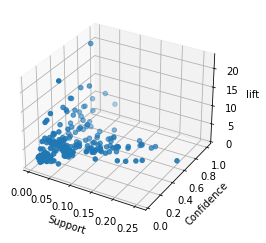

In [32]:
fig = plt.figure()
ax= fig.add_subplot(111, projection = '3d')
ax.scatter(support,confidence,lift)
ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("lift")


Text(0, 0.5, 'confidence')

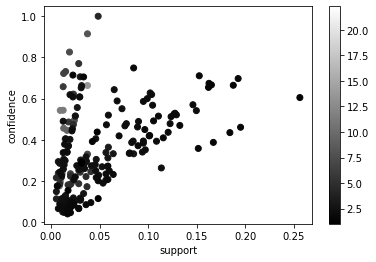

In [33]:
## Scatter plot
import scipy as sp
plt.scatter(x=support, y=confidence, c=lift , cmap = 'gray')
plt.colorbar()
plt.xlabel("support")
plt.ylabel("confidence")


In [34]:
"""Total number of rules are 212, wuth minimum support = 0.005 and maximum length = 4 , 
which are without any reducdancies"""



In [39]:
############### Changing the support value to 0.007
frequent_items1 = apriori(books,min_support = 0.007,max_len = 4 , use_colnames = True)
frequent_items1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
466,0.0090,"(ArtBks, GeogBks, Florence, ItalArt)"
467,0.0125,"(ArtBks, ItalCook, ItalArt, ItalAtlas)"
468,0.0095,"(ArtBks, Florence, ItalArt, ItalCook)"
469,0.0090,"(GeogBks, ItalCook, ItalArt, ItalAtlas)"


In [40]:
#Most frequent items based on the support, decending order
frequent_items1.sort_values('support', ascending = False, inplace = True)
frequent_items1

,support,itemsets
2,0.431,(CookBks)
0,0.423,(ChildBks)
3,0.282,(DoItYBks)
6,0.276,(GeogBks)
12,0.256,"(CookBks, ChildBks)"
...,...,...
324,0.007,"(GeogBks, Florence, ChildBks, ItalArt)"
309,0.007,"(RefBks, Florence, ChildBks, ItalCook)"
296,0.007,"(DoItYBks, Florence, ChildBks, ItalCook)"
445,0.007,"(DoItYBks, Florence, ItalCook, ArtBks)"


In [46]:
##Building rules
rules2 = association_rules(frequent_items1 , metric = 'lift' , min_threshold = 1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
4,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
...,...,...,...,...,...,...,...,...,...
4551,"(ItalCook, ItalAtlas)","(GeogBks, DoItYBks)",0.0230,0.1325,0.0070,0.304348,2.296965,0.003952,1.247031
4552,(GeogBks),"(DoItYBks, ItalAtlas, ItalCook)",0.2760,0.0125,0.0070,0.025362,2.028986,0.003550,1.013197
4553,(DoItYBks),"(GeogBks, ItalCook, ItalAtlas)",0.2820,0.0150,0.0070,0.024823,1.654846,0.002770,1.010073
4554,(ItalAtlas),"(GeogBks, DoItYBks, ItalCook)",0.0370,0.0345,0.0070,0.189189,5.483745,0.005724,1.190783


In [47]:
##Rules2 are the rules which are generated with the minimum threshold as 1
rules2.sort_values('lift',ascending = False , inplace = True)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2157,"(RefBks, ItalArt)","(ArtBks, ItalAtlas)",0.0200,0.0180,0.0165,0.825000,45.833333,0.016140,5.611429
2160,"(ArtBks, ItalAtlas)","(RefBks, ItalArt)",0.0180,0.0200,0.0165,0.916667,45.833333,0.016140,11.760000
3316,"(GeogBks, ItalAtlas)","(RefBks, ItalArt)",0.0205,0.0200,0.0115,0.560976,28.048780,0.011090,2.232222
3313,"(RefBks, ItalArt)","(GeogBks, ItalAtlas)",0.0200,0.0205,0.0115,0.575000,28.048780,0.011090,2.304706
3122,"(ItalCook, ItalAtlas)","(RefBks, ItalArt)",0.0230,0.0200,0.0125,0.543478,27.173913,0.012040,2.146667
...,...,...,...,...,...,...,...,...,...
1012,(DoItYBks),(Florence),0.2820,0.1085,0.0315,0.111702,1.029513,0.000903,1.003605
3578,"(DoItYBks, YouthBks, ChildBks)",(Florence),0.0950,0.1085,0.0105,0.110526,1.018676,0.000192,1.002278
3587,(Florence),"(DoItYBks, YouthBks, ChildBks)",0.1085,0.0950,0.0105,0.096774,1.018676,0.000192,1.001964
671,(Florence),(CookBks),0.1085,0.4310,0.0475,0.437788,1.015749,0.000737,1.012074


In [48]:
###Elimiinating the reducdancies

def to_list1(i):
    return(sorted(i))
to_list(i)

['ItalCook', 'YouthBks']

In [54]:
ma_x1 = rules2.antecedents.apply(to_list1)+ rules2.consequents.apply(to_list1)
ma_x1 = ma_x1.apply(sorted)
print(ma_x1)

2157        [ArtBks, ItalArt, ItalAtlas, RefBks]
2160        [ArtBks, ItalArt, ItalAtlas, RefBks]
3316       [GeogBks, ItalArt, ItalAtlas, RefBks]
3313       [GeogBks, ItalArt, ItalAtlas, RefBks]
3122      [ItalArt, ItalAtlas, ItalCook, RefBks]
                          ...                   
1012                        [DoItYBks, Florence]
3578    [ChildBks, DoItYBks, Florence, YouthBks]
3587    [ChildBks, DoItYBks, Florence, YouthBks]
671                          [CookBks, Florence]
670                          [CookBks, Florence]
Length: 4556, dtype: object


In [57]:
return_rules1 = list(ma_x1)
unique_rules1 = [list(m) for m in set(tuple(i) for i  in return_rules1 )]
index_rules1 = []


In [58]:
for i in unique_rules1:
    index_rules1.append(return_rules1.index(i))
print(i)

['ArtBks', 'ChildBks', 'GeogBks', 'ItalAtlas']


In [59]:
### eliminate rules with reducdancies 
rules_without_reduc = rules2.iloc[index_rules1,:]
rules_without_reduc

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3568,"(DoItYBks, YouthBks)","(ChildBks, ItalArt)",0.1155,0.0360,0.0105,0.090909,2.525253,0.006342,1.060400
1877,"(ItalArt, YouthBks)","(ArtBks, ItalCook)",0.0230,0.0565,0.0190,0.826087,14.621008,0.017701,5.425125
1964,"(DoItYBks, ItalCook)","(ChildBks, ItalArt)",0.0585,0.0360,0.0185,0.316239,8.784425,0.016394,1.409850
2069,(ItalAtlas),"(RefBks, YouthBks)",0.0370,0.0965,0.0175,0.472973,4.901274,0.013930,1.714333
561,"(GeogBks, DoItYBks)","(RefBks, ChildBks)",0.1325,0.1515,0.0525,0.396226,2.615356,0.032426,1.405328
...,...,...,...,...,...,...,...,...,...
360,(GeogBks),(ItalCook),0.2760,0.1135,0.0640,0.231884,2.043031,0.032674,1.154123
3494,"(ChildBks, ItalCook)","(DoItYBks, ItalAtlas)",0.0850,0.0190,0.0110,0.129412,6.811146,0.009385,1.126824
3272,"(RefBks, ArtBks)","(Florence, DoItYBks)",0.0895,0.0315,0.0115,0.128492,4.079099,0.008681,1.111292
1040,(RefBks),(Florence),0.2145,0.1085,0.0310,0.144522,1.332001,0.007727,1.042108


In [61]:
##Sorting the rules
rules_without_reduc.sort_values('lift', ascending = False, inplace = True)
rules_without_reduc          ### A Total of 459 rules

C:\Users\sagri\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2157,"(RefBks, ItalArt)","(ArtBks, ItalAtlas)",0.0200,0.0180,0.0165,0.825000,45.833333,0.016140,5.611429
3316,"(GeogBks, ItalAtlas)","(RefBks, ItalArt)",0.0205,0.0200,0.0115,0.560976,28.048780,0.011090,2.232222
3122,"(ItalCook, ItalAtlas)","(RefBks, ItalArt)",0.0230,0.0200,0.0125,0.543478,27.173913,0.012040,2.146667
2636,"(ChildBks, ItalAtlas)","(RefBks, ItalArt)",0.0285,0.0200,0.0145,0.508772,25.438596,0.013930,1.995000
3849,"(RefBks, ItalArt)","(DoItYBks, ItalAtlas)",0.0200,0.0190,0.0095,0.475000,25.000000,0.009120,1.868571
...,...,...,...,...,...,...,...,...,...
0,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
1040,(RefBks),(Florence),0.2145,0.1085,0.0310,0.144522,1.332001,0.007727,1.042108
655,(ChildBks),(Florence),0.4230,0.1085,0.0485,0.114657,1.056748,0.002605,1.006955
1013,(Florence),(DoItYBks),0.1085,0.2820,0.0315,0.290323,1.029513,0.000903,1.011727


In [62]:
## 3D plots
support2 = rules_without_reduc["support"]
confidence2 =  rules_without_reduc["confidence"]
lift2 = rules_without_reduc["lift"]

Text(0.5, 0, 'lift')

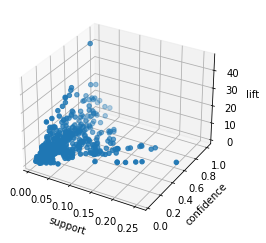

In [63]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support2,confidence2,lift2)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

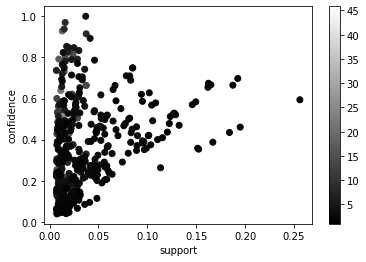

In [64]:
## Scatter plot
plt.scatter(support2,confidence2, c =lift2, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

In [65]:
############# Changing the minimum support value to 0.6 and maximum length = 3

frequent_items2 = apriori(books, min_support = 0.1 , max_len = 3,use_colnames = True)
frequent_items2 

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [67]:
## Sorting the rules is decending order
frequent_items2.sort_values('support', ascending = False, inplace = True)
frequent_items2

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
10,0.2560,"(CookBks, ChildBks)"
1,0.2475,(YouthBks)
5,0.2410,(ArtBks)
4,0.2145,(RefBks)
14,0.1950,"(GeogBks, ChildBks)"
22,0.1925,"(GeogBks, CookBks)"


In [68]:
## Building the rules 
rules3 = association_rules(frequent_items2, metric = 'lift', min_threshold = 1 )
rules3 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
4,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
...,...,...,...,...,...,...,...,...,...
95,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
96,(CookBks),"(ArtBks, DoItYBks)",0.4310,0.1235,0.1015,0.235499,1.906873,0.048272,1.146499
97,(DoItYBks),"(ArtBks, CookBks)",0.2820,0.1670,0.1015,0.359929,2.155264,0.054406,1.301418
98,(ArtBks),(YouthBks),0.2410,0.2475,0.1010,0.419087,1.693281,0.041353,1.295375


In [69]:
rules3.sort_values('lift', ascending = False, inplace = True )
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
63,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
87,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
90,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
95,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
8,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
16,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
17,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


In [70]:
### To remove the reducdancies
def to_list3(i):
    return(sorted(i))
print(i)

['ArtBks', 'ChildBks', 'GeogBks', 'ItalAtlas']


In [73]:
max_x2 = rules3.antecedents.apply(to_list3)+rules3.consequents.apply(to_list3)
max_x2 = max_x2.apply(sorted)
max_x2 

62            [CookBks, ItalCook]
63            [CookBks, ItalCook]
87    [ArtBks, ChildBks, GeogBks]
90    [ArtBks, ChildBks, GeogBks]
95    [ArtBks, CookBks, DoItYBks]
                 ...             
8            [ChildBks, DoItYBks]
16            [CookBks, YouthBks]
17            [CookBks, YouthBks]
1             [ChildBks, CookBks]
0             [ChildBks, CookBks]
Length: 100, dtype: object

In [74]:
### to find unique rules

return_rules3 = list(max_x2)
unique_rules3 = [list(m) for m in set(tuple(i) for i in return_rules3)]

index_rules3=[]

In [75]:
for i in unique_rules3:
    index_rules3.append(return_rules3.index(i))
print(i)

['CookBks', 'ItalCook']


In [76]:
## removing reducdancies
rules_without_reduc1 = rules3.iloc[index_rules3,:]    
rules_without_reduc1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
95,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
54,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
24,"(CookBks, ChildBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
69,(GeogBks),"(CookBks, DoItYBks)",0.2760,0.1875,0.1085,0.393116,2.096618,0.056750,1.338806
41,(YouthBks),"(CookBks, ChildBks)",0.2475,0.2560,0.1290,0.521212,2.035985,0.065640,1.553924
9,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
72,(RefBks),(DoItYBks),0.2145,0.2820,0.1055,0.491841,1.744119,0.045011,1.412945
35,(DoItYBks),(GeogBks),0.2820,0.2760,0.1325,0.469858,1.702385,0.054668,1.365672
61,(YouthBks),(DoItYBks),0.2475,0.2820,0.1155,0.466667,1.654846,0.045705,1.346250
87,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628


In [77]:
## Sorting these rules
rules_without_reduc1.sort_values('lift', ascending = False, inplace = True)
rules_without_reduc1          ## A total of 30 rules are formed.

C:\Users\sagri\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
87,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
95,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
85,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
54,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
24,"(CookBks, ChildBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
69,(GeogBks),"(CookBks, DoItYBks)",0.2760,0.1875,0.1085,0.393116,2.096618,0.056750,1.338806
75,"(DoItYBks, ChildBks)",(GeogBks),0.1840,0.2760,0.1045,0.567935,2.057735,0.053716,1.675673
46,"(CookBks, ChildBks)",(ArtBks),0.2560,0.2410,0.1265,0.494141,2.050376,0.064804,1.500417
41,(YouthBks),"(CookBks, ChildBks)",0.2475,0.2560,0.1290,0.521212,2.035985,0.065640,1.553924


In [78]:
# 3D plots
support3 = rules_without_reduc1["support"]
confidence3 = rules_without_reduc1["confidence"]
lift3 = rules_without_reduc1["lift"]


Text(0.5, 0, 'lift')

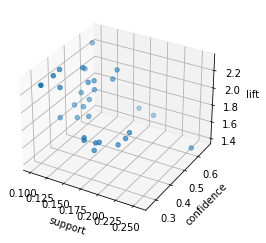

In [79]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection = '3d')
ax3.scatter(support3,confidence3,lift3)
ax3.set_xlabel("support")
ax3.set_ylabel("confidence")
ax3.set_zlabel("lift")

Text(0, 0.5, 'Confidence')

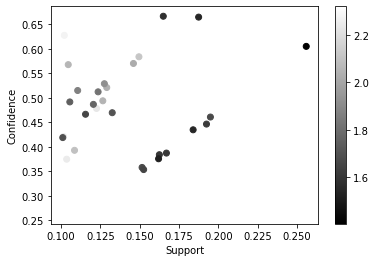

In [80]:
## Scatter plot
plt.scatter(support3, confidence3, c=lift3 , cmap='gray')
plt.colorbar()
plt.xlabel("Support");plt.ylabel("Confidence")